# Midterm Project | Machine Learning Zoom Camp 2022 <br>

# Subscription to Term Deposit Prediction

## Contents:

1. Business Problem Description
2. About the Dataset
2. Getting the Dataset
3. Reading the dataset with Pandas

## 1. Business Problem Description

Banks are the most influential financial institutions of our time. They make revenue by selling their products to the customers. Some examples of products from a bank are savings account, credit card, personal loan, house loan etc. A bank (name unknown) wants to launch a campaign to sell a product called `term-deposit`. This particular bank wants to do a targeted campaign, i.e. they want to call, send an email or post to targeted customers, who are likely to buy this product. The goal of this project is to predict whether a customer is likely to buy this product or not.  Fortunately, this bank has datas from a previous campaign. This dataset contains demographic and banking information about customers and also the outcome of the campaign, i.e. whether they subscribed to the product after the campaign or not. In this project, we want to train a model on this dataset in order to predict whether after a targeted campaign, a particular customer will subscribed to the product 'term deposit' or not. Since we want our model to predict yes or no, this is a binary classification problem.

## 2. About the dataset

The dataset has 18 features and 45211 rows. In the table below, meaning of each feature is written:


|  Feature Name  |             Description             |  Datatype  |
|:--------:|:-----------------------------------:|:-----------------------------------:|
|    **Id**   |  customer identification number  |   int    |
|    **age**   |  age of the customer |    float  | 
|    **job**   |  job of the customer |    string  |
|   **marital**   | marital status of the customer | string |
| **education** |    education qualification of the customer   | string |
| **default** |  whether customer has credit in default | binary:yes or no| 
|  **balance**  |average yearly balance of the customer in Euros  |float | 
| **housing**  |  whether customer has housing loan| binary: yes, no |
| **loan**  |  whether customer has personal loans | binary: yes, no |
| **contact**  |  bank's communication type to contact the customer | string: telephone, cellular and unknown |
| **day***  |  last contact day of the month | int |
| **month***  |  last contact month of year|  string: jan, feb, mar, ....,nov and dec |
| **duration**  |  last contact duration in seconds| int |
| **campaign**  |  number of contacts performed during this campaign with the customer  | int | 
| **pdays**  |  number of days that passed by after the client was last contacted from a previous campaign (-1 means that client was not previously contacted  | int  |
| **previous**  |  number of contacts performed before this campaign with the customer | int | 
| **poutcome**  |  outcome of previous marketing campaign | string: unknown, other, failure and success  |
| **y**  |  target variable, has the client subscribed to a term deposit product? | binary: yes or no |


*In the table above almost all features are self explanatory, except `day` and `month`.  Both the features together mean, last contact date e.g. a `day = 2`, and `month = may` would mean, customer was contacted last on 2nd May. We don't know the year, but it is not relevant for our training. 

## 3. Getting the dataset

- link to dataset: [https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit](https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit)

            or,

- [https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv](https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv)

You can download the dataset into your local directory with `wget` 

In [1]:
data = 'https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv'

In [2]:
#!wget $data

In [3]:
ls

model.bin             notebook.ipynb                 README.md
model_lg.bin          predict.py                     report.md
notebook-clean.ipynb  predict-term-deposit-data.csv  train.py


## 4. Reading the dataset with pandas 

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('predict-term-deposit-data.csv')

In [6]:
df.head().T

,0,1,2,3,4
Id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


Above we get a first view of the dataset. There are 18 features. Some of them are numbers and some are strings.

In [7]:
df.shape

(45211, 18)

We have 45211 rows and 18 columns in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


Above we see the features, non-null count and their datatype. After having a first look at he dataset, now we will see if the dataset needs any preprocessing or, preparation before training.  

## 5. Data Pre-processing / Preparation 

In this section, we have two goals:

1. check if feature names are consistent, i.e. all feature names are in small letters, if there is a separation, then it is consistently underscore (`_`) and not something else such as minus (`-`), white space, dots (`.`) etc.
2. Data types of features make sense, e.g. age is integer or float but, not a string.
3. strings of the dataset are consistent similar to number 1. above.

In [9]:
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


In [10]:
df.dtypes

id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

We see above that datatypes of all features are as they are expected to be.

In [11]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(col+'-->', df_[col].unique()) # to print categories name only

job--> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital--> ['married' 'single' 'divorced']
education--> ['tertiary' 'secondary' 'unknown' 'primary']
default--> ['no' 'yes']
housing--> ['yes' 'no']
loan--> ['no' 'yes']
contact--> ['unknown' 'cellular' 'telephone']
month--> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome--> ['unknown' 'failure' 'other' 'success']
y--> ['no' 'yes']


Above we see the name of categorical and binary features and the unique values in them. We see that there are no inconsistencies in their values. Thus, it doesn't need any processing from us.

### converting `day` and `month` into `day_of_year`

The feature `day` and `month` needs to be converted to `day_of_Year`. This is because day and month together means the the last date on which customer was contacted. So this is basically one information in two columns and we have to convert them into one feature. I will convert day and month into day of year. So when this numnber is high, it means that customer has been contacted recently. Lower this number is, more days have passed by since the customer was last contacted. This conversion is done below:

In [12]:
df['day'] = df['day'].map(str)

type(df['day'][10])

str

In [13]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [14]:
month_mapping = {
    'jan': '1',
    'feb': '2',
    'mar': '3',
    'apr': '4',
    'may': '5',
    'jun': '6',
    'jul': '7', 
    'aug': '8', 
    'sep': '9',
    'oct': '10', 
    'nov': '11', 
    'dec': '12' 
}
df['month'] = df['month'].map(month_mapping)
df.month.unique()

array(['5', '6', '7', '8', '10', '11', '12', '1', '2', '3', '4', '9'],
      dtype=object)

In [15]:
type(df.month[100])

str

In [16]:
df['date_formatted'] = pd.to_datetime(
    dict(         
        year='2055',
        month=df['month'], 
        day=df['day']
    )
)
df.head().T

,0,1,2,3,4
id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


In [17]:
df['day_of_year']=df['date_formatted'].dt.dayofyear
df.head().T

,0,1,2,3,4
id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


In [18]:
df.day_of_year.unique()

array([125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 139, 140, 141,
       143, 146, 147, 148, 149, 150, 153, 154, 155, 156, 157, 160, 162,
       163, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 181, 182,
       183, 184, 185, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199,
       202, 203, 204, 205, 206, 209, 210, 211, 212, 216, 217, 218, 219,
       220, 223, 224, 225, 226, 230, 231, 232, 233, 234, 237, 238, 239,
       240, 241, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 308, 309, 310, 312, 313, 314, 315, 316, 317,
       318, 321, 322, 323, 324, 325, 326, 331, 338, 339, 341, 342, 343,
       345, 346, 347, 356, 361,  28,  29,  30,  33,  34,  35,  36,  37,
        40,  41,  42,  43,  44,  47,  48,  49,  50,  57,  58,  61,  62,
        63,  64,  65,  68,  69,  70,  71,  72,  75,  76,  77,  78,  79,
        82,  83,  84,  85,  86,  89,  90,  91,  92,  93,  96,  97,  98,
        99, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 11

In [19]:
df.day_of_year.dtypes

dtype('int64')

`day` `month` are converted to `day_of_year` in type `int`. Now we don't need the columns 'day','month','date_formatted' anymore, we'll delete them. We'll also delete the columns `id`, because it is just an serial `id` number, that goes from 1001, 1002, 1003 and so on. It is given to the customer by the bank and has no influence (based on logic) on whether customer will subscribe to a term-deposit.

In [20]:
df = df.drop(columns = ['id','day','month','date_formatted'])
df.dtypes

age            float64
job             object
marital         object
education       object
default         object
balance        float64
housing         object
loan            object
contact         object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
day_of_year      int64
dtype: object

### Converting 'yes - no' columns into 1-0 columns

Before splitting, we have to convert yes-no columns i.e. (`default`,`housing`,`loan` and the target variable `y`) into 1 and 0. We have to do it for the whole dataset.

In [21]:
df.default = (df.default == 'yes').astype(int)
df.housing = (df.housing == 'yes').astype(int)
df.loan = (df.loan == 'yes').astype(int)
df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,day_of_year
0,999.0,management,married,tertiary,0,2143.0,1,0,unknown,261,1,-1,0,unknown,0,125
1,44.0,technician,single,secondary,0,29.0,1,0,unknown,151,1,-1,0,unknown,0,125
2,33.0,entrepreneur,married,secondary,0,2.0,1,1,unknown,76,1,-1,0,unknown,0,125
3,47.0,blue-collar,married,unknown,0,1506.0,1,0,unknown,92,1,-1,0,unknown,0,125
4,33.0,unknown,single,unknown,0,1.0,0,0,unknown,198,1,-1,0,unknown,0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,0,825.0,0,0,cellular,977,3,-1,0,unknown,1,321
45207,71.0,retired,divorced,primary,0,1729.0,0,0,cellular,456,2,-1,0,unknown,1,321
45208,72.0,retired,married,secondary,0,5715.0,0,0,cellular,1127,5,184,3,success,1,321
45209,57.0,blue-collar,married,secondary,0,668.0,0,0,telephone,508,4,-1,0,unknown,0,321


## 6. Splitting full dataset into train, validation and test datasets

After the above preprocessing, that can be done to the whole datasets, now we can split our datasets for training, validation and testing.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [25]:
df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

In [26]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values

In [27]:
del df_train['y']
del df_val['y']
del df_test['y']
#del df_full_train['y'] remember to do it later, for training on full_train

In [28]:
df.shape, df_full_train.shape, df_test.shape, df_val.shape, df_train.shape

((45211, 16), (36168, 16), (9043, 15), (9042, 15), (27126, 15))

In [29]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
0,39.0,unemployed,married,primary,0,590.0,1,0,cellular,190,2,-1,0,unknown,35
1,53.0,management,divorced,secondary,0,1355.0,0,1,cellular,447,2,196,8,other,35
2,53.0,services,divorced,primary,0,0.0,0,1,cellular,206,1,-1,0,unknown,189
3,35.0,technician,married,tertiary,0,1473.0,1,0,unknown,84,3,-1,0,unknown,132
4,53.0,unemployed,divorced,tertiary,0,0.0,1,1,cellular,140,2,-1,0,unknown,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,31.0,student,single,unknown,0,2882.0,1,0,cellular,158,2,-1,0,unknown,126
27122,39.0,management,married,tertiary,0,5060.0,1,0,cellular,157,4,-1,0,unknown,232
27123,30.0,blue-collar,married,primary,0,935.0,1,0,cellular,96,2,-1,0,unknown,36
27124,35.0,management,married,tertiary,0,2123.0,1,0,cellular,249,3,-1,0,unknown,202


## 6. Exploratory Data Analysis (EDA) on training data

We have done some preprocessing into our data, then we splitted full dataset into three parts. Now we can do EDA on the train dataset. The reason we want to do EDA only on train dataset is that, we want to treat validation and test dataset as dataset of the future, i.e. datas that we don't have yet. 

In [29]:
df_train.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,day_of_year
count,27122.000000,27126.000000,27125.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000
mean,40.902773,0.017437,1347.000406,0.557288,0.160805,259.155497,2.762368,40.633783,0.590504,171.309334
std,12.102878,0.130896,3008.582709,0.496716,0.367358,258.811857,3.101016,100.351285,2.513575,74.882706
min,-1.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,6.000000
25%,33.000000,0.000000,71.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,129.000000
50%,39.000000,0.000000,447.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,156.000000
75%,48.000000,0.000000,1416.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,217.000000
max,999.000000,1.000000,102127.000000,1.000000,1.000000,3881.000000,63.000000,854.000000,275.000000,365.000000


In [30]:
df_train.shape

(27126, 15)

Above we see that:

- `pdays` has some values as `-1`. This doesn't make sense bcecause, it is the number of days that passed by after the client was last contacted from a previous campaign. `-1` means that client was not previously contacted. 
- min value of age is -1 and max value of age is 999. That doesn't make sense. We have to investigate it.
- count of age and balance are not 27126. Most likely they have missing values. Anyhow we'll check missing values soon.

### Dealing with -1 values in `pdays`

In [31]:
df['pdays'].value_counts(normalize='true')

-1      0.817367
 182    0.003694
 92     0.003251
 91     0.002787
 183    0.002787
          ...   
 449    0.000022
 452    0.000022
 648    0.000022
 595    0.000022
 530    0.000022
Name: pdays, Length: 559, dtype: float64

We see that, 81% of values in `pdays` are `-1`, i.e. they were not contacted.

Possible options to deal with it:

1. Replace `-1` with a very large number e.g. 999999 which will have the same effect as if they are not being contacted for a long time,almost similar to not contacted at all. 
2. Remove the column entirely

Here I try with first option.

In [32]:
df_train['pdays'] = df_train['pdays'].replace([-1], 999999999)
df_test['pdays'] = df_test['pdays'].replace([-1], 999999999)
df_val['pdays'] = df_val['pdays'].replace([-1], 999999999)
df_full_train['pdays'] = df_full_train['pdays'].replace([-1], 999999999)

In [33]:
df['pdays'].value_counts(normalize='true')

-1      0.817367
 182    0.003694
 92     0.003251
 91     0.002787
 183    0.002787
          ...   
 449    0.000022
 452    0.000022
 648    0.000022
 595    0.000022
 530    0.000022
Name: pdays, Length: 559, dtype: float64

### Dealing with illogical values (-1 and 999 for age)

options:
- fill with zero, mean, mode or median

I will replace them here with mode.

In [34]:
df_train.age.min()

-1.0

In [35]:
df_train.age.max()

999.0

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


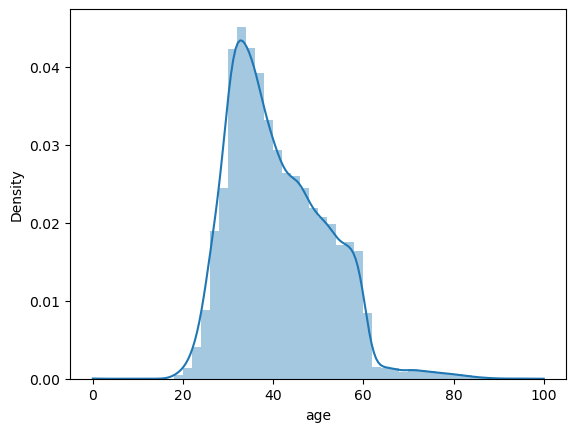

In [36]:
sns.distplot(df_train['age'], kde=True, hist=True, kde_kws={"clip":(0,100)}, hist_kws={"range":(0,100)})
plt.show()

In [37]:
(df.age.values == 999).sum()

1

In [38]:
(df.age.values == -1).sum()

3

In [39]:
(df.age.values > 100).sum()

1

In [40]:
(df.age.values < 15).sum()

3

Thus, we have 1 value 999 and only 3 values -1. All other values are in between 15 and 1000 and that makes sense. We'll now replace these illogical values with mode of age.

In [41]:
df_train['age'].mode()[0]

32.0

In [42]:
df_train['age'] = df_train['age'].replace([-1, 999], df_train['age'].mode()[0])
df_val['age'] = df_val['age'].replace([-1, 999], df_val['age'].mode()[0])
df_test['age'] = df_test['age'].replace([-1, 999], df_test['age'].mode()[0])
df_full_train['age'] = df_full_train['age'].replace([-1, 999], df_full_train['age'].mode()[0])

In [43]:
(df_train.age.values == -1).sum()

0

In [44]:
df_train.age.describe()

count    27122.000000
mean        40.870769
std         10.604226
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

### Dealing with Missing Values

In [45]:
df_train.isnull().sum()

age            4
job            0
marital        0
education      0
default        0
balance        1
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
day_of_year    0
dtype: int64

In [46]:
df_train['age'] = df_train['age'].fillna(df_train['age'].mode()[0])
df_val['age'] = df_val['age'].fillna(df_val['age'].mode()[0])
df_test['age'] = df_test['age'].fillna(df_test['age'].mode()[0])
df_full_train['age'] = df_full_train['age'].fillna(df_full_train['age'].mode()[0])

df_train['balance'] = df_train['balance'].fillna(df_train['balance'].mode()[0])
df_val['balance'] = df_val['balance'].fillna(df_val['balance'].mode()[0])
df_test['balance'] = df_test['balance'].fillna(df_test['balance'].mode()[0])
df_full_train['balance'] = df_full_train['balance'].fillna(df_full_train['balance'].mode()[0])

### EDA: inspecting features with histograms

In [47]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'day_of_year'],
      dtype='object')

In [48]:
df_train.dtypes

age            float64
job             object
marital         object
education       object
default          int64
balance        float64
housing          int64
loan             int64
contact         object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
day_of_year      int64
dtype: object

In [49]:
cols_numerical = list(df_train.select_dtypes(include='number').columns)
cols_categorical = list(df_train.select_dtypes(exclude='number').columns)
cols_numerical

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'day_of_year']

/tmp/ipykernel_15196/4096612376.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(bins=100, ax=ax, layout=(5, 2), column=cols_numerical)


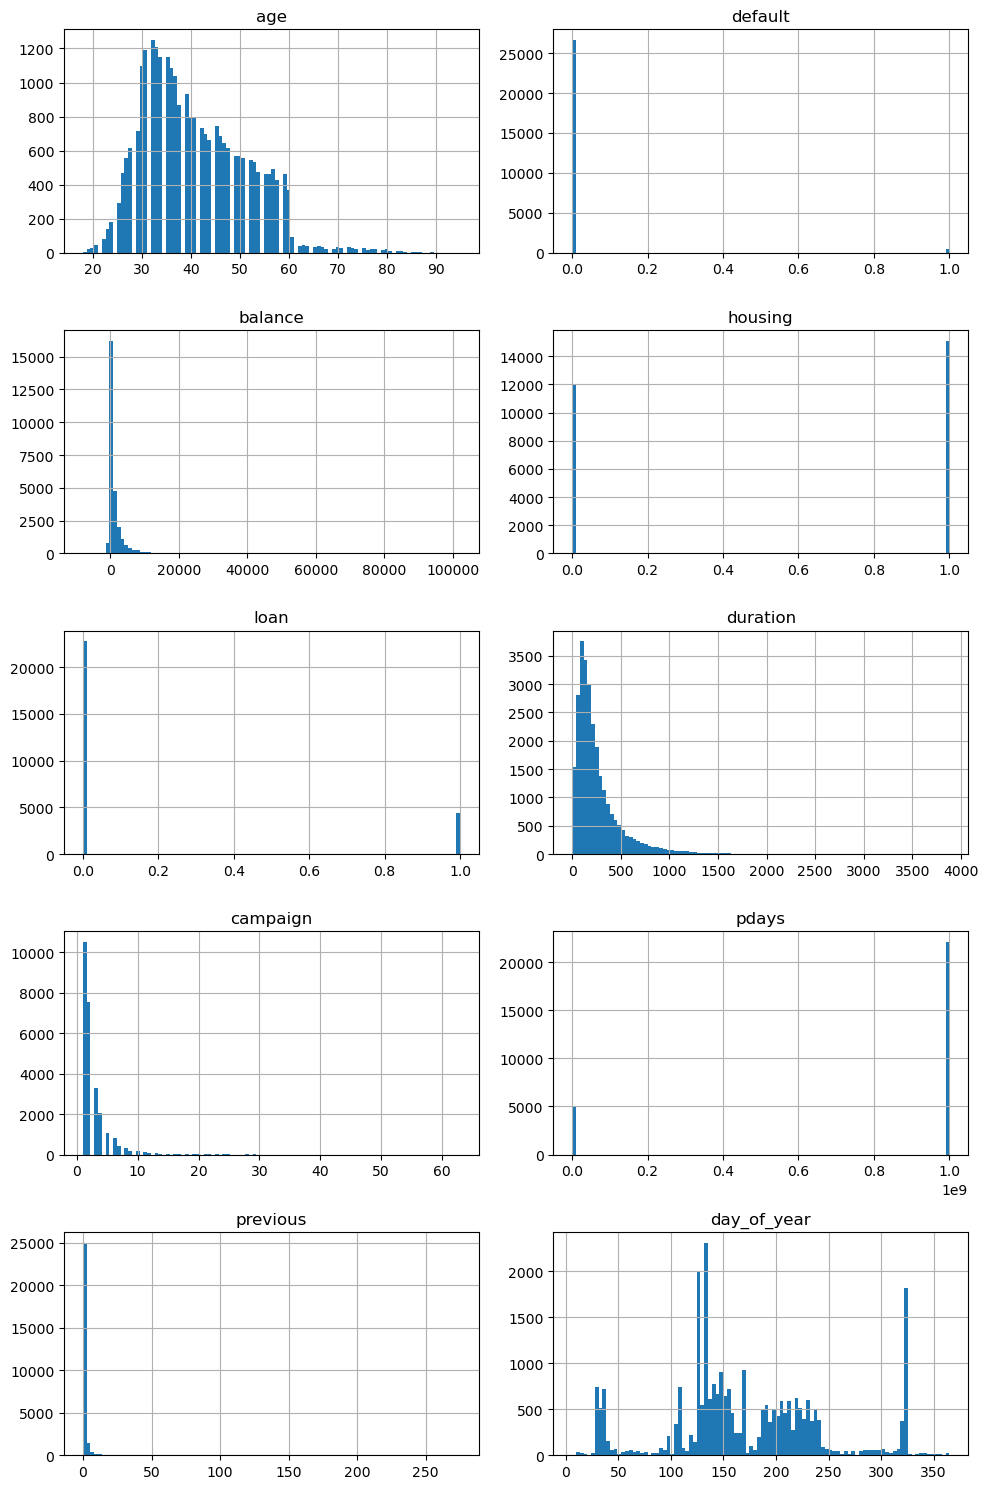

In [50]:
fig = plt.figure(figsize=(10,15))
ax = plt.gca()
df_train.hist(bins=100, ax=ax, layout=(5, 2), column=cols_numerical)
plt.tight_layout()
plt.show()

### 6.4 EDA: success rate

In [51]:
global_success_rate = y_train.mean().round(3)
global_success_rate

0.117

**11.7%** is the global success rate i.e. 11.7% of customers subscibed to term-deposit after the campaign.

In [52]:
cols_categorical

['job', 'marital', 'education', 'contact', 'poutcome']

In [53]:
df_train[cols_categorical].nunique()

job          12
marital       3
education     4
contact       3
poutcome      4
dtype: int64

In [54]:
df_full_train.marital.value_counts(normalize=True)

married     0.602964
single      0.282275
divorced    0.114761
Name: marital, dtype: float64

Thus 60% of customrs are married, 28.2% are single and 11.4% are divorced.

In [55]:
success_rate_married = round(df_full_train[df_full_train.marital=='married'].y.mean(),3)
success_rate_single = round(df_full_train[df_full_train.marital=='single'].y.mean(),3)
success_rate_divorced = round(df_full_train[df_full_train.marital=='divorced'].y.mean(),3)
print(success_rate_married, success_rate_single, success_rate_divorced)

0.104 0.144 0.119


Thus, success rate for bank among singles (14.4%) are the highest and it is above global success rate of 11.7%.  

In [56]:
df_full_train.education.value_counts(normalize=True)

secondary    0.512313
tertiary     0.294035
primary      0.151478
unknown      0.042174
Name: education, dtype: float64

50% of the customers are with secondary education.

In [57]:
success_rate_secondary = round(df_full_train[df_full_train.education=='secondary'].y.mean(),3)
success_rate_tertiary = round(df_full_train[df_full_train.education=='tertiary'].y.mean(),3)
success_rate_primary = round(df_full_train[df_full_train.education=='primary'].y.mean(),3)
success_rate_unknown = round(df_full_train[df_full_train.education=='unknown'].y.mean(),3)
print(success_rate_secondary, success_rate_tertiary, success_rate_primary, success_rate_unknown)

0.104 0.151 0.09 0.136


Here success rate among tertiary (15.1%) and unknown group (13.6%) is higher than globla average of 11%.

In [58]:
df_full_train.contact.value_counts(normalize=True)

cellular     0.650741
unknown      0.285077
telephone    0.064182
Name: contact, dtype: float64

Bank contact 65% of the customers with cellular, while only 6% are with telephone.

In [59]:
success_rate_cellular = round(df_full_train[df_full_train.contact=='cellular'].y.mean(),3)
success_rate_telephone = round(df_full_train[df_full_train.contact=='telephone'].y.mean(),3)
success_rate_unknown_contact = round(df_full_train[df_full_train.contact=='unknown'].y.mean(),3)

print(success_rate_cellular, success_rate_telephone, success_rate_unknown_contact)

0.148 0.13 0.043


Both cellular (14.8%) and telephone (13%) has higher success rate than global (11%).

In [60]:
df_full_train.poutcome.value_counts(normalize=True)

unknown    0.814680
failure    0.110300
other      0.041436
success    0.033584
Name: poutcome, dtype: float64

In [61]:
round(df_full_train.job.value_counts(normalize=True),3)

blue-collar      0.214
management       0.211
technician       0.168
admin.           0.114
services         0.093
retired          0.049
self-employed    0.034
entrepreneur     0.033
unemployed       0.030
housemaid        0.027
student          0.021
unknown          0.006
Name: job, dtype: float64

Highest percentage of customers are blue-collar(21.4%) and management(21.1%) workers.

In [62]:
success_rate_blue_collar = round(df_full_train[df_full_train.job=='blue-collar'].y.mean(),3)
success_rate_management = round(df_full_train[df_full_train.job=='management'].y.mean(),3)
success_rate_technician = round(df_full_train[df_full_train.job=='technician'].y.mean(),3)
success_rate_admin = round(df_full_train[df_full_train.job=='admin.'].y.mean(),3)
print(success_rate_blue_collar,success_rate_management, success_rate_technician, success_rate_admin)

0.075 0.137 0.112 0.118


### 6.5 EDA: Success ratio

In [63]:
from IPython.display import display

In [64]:
for c in cols_categorical:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_success_rate
    df_group['success'] = df_group['mean'] / global_success_rate
    display(df_group)
    print()
    print()

job


,mean,count,diff,success
job,,,,
admin.,0.118425,3099,0.001425,1.012182
blue-collar,0.074673,5812,-0.042327,0.638232
entrepreneur,0.090100,899,-0.026900,0.770086
housemaid,0.095890,730,-0.021110,0.819576
management,0.136888,5720,0.019888,1.169984
retired,0.230308,1333,0.113308,1.968441
self-employed,0.112069,928,-0.004931,0.957854
services,0.081543,2514,-0.035457,0.696952
student,0.288225,569,0.171225,2.463461




marital


,mean,count,diff,success
marital,,,,
divorced,0.119178,3113,0.002178,1.018612
married,0.103876,16356,-0.013124,0.887831
single,0.144182,7657,0.027182,1.232323




education


,mean,count,diff,success
education,,,,
primary,0.090046,4109,-0.026954,0.769626
secondary,0.103835,13897,-0.013165,0.887482
tertiary,0.151078,7976,0.034078,1.291267
unknown,0.136364,1144,0.019364,1.165501




contact


,mean,count,diff,success
contact,,,,
cellular,0.148312,17652,0.031312,1.267622
telephone,0.130385,1741,0.013385,1.114400
unknown,0.042545,7733,-0.074455,0.363632




poutcome


,mean,count,diff,success
poutcome,,,,
failure,0.127005,2992,0.010005,1.085516
other,0.157473,1124,0.040473,1.345926
success,0.636663,911,0.519663,5.441564
unknown,0.092176,22099,-0.024824,0.787830


In above tables, a success > 1, means that sucess rate for that group is above global success rate. Also, positive diff means that success rate for this group is more than the global success rate.



### 6.6 EDA: Feature importance -  mutual information  (for categorical variables)

In [65]:
from sklearn.metrics import mutual_info_score

In [66]:
def mutual_info_success_score(series):
    return mutual_info_score(series, df_full_train.y)

In [67]:
mutual_info = df_full_train[cols_categorical].apply(mutual_info_success_score)
mutual_info.sort_values(ascending=False)

poutcome     0.028336
contact      0.012758
job          0.008243
education    0.002622
marital      0.001471
dtype: float64

In [68]:
df_train.poutcome.value_counts()

unknown    22099
failure     2992
other       1124
success      911
Name: poutcome, dtype: int64

**Observations:**

- `poutcome` i.e. outcome of previous marketing campaign and `contact` are the most important variables among the categorical variables.

### 6.7 EDA: Correlation (for numerical variables)

In [69]:
corrM = df_train.corr()
corrM

,age,default,balance,housing,loan,duration,campaign,pdays,previous,day_of_year
age,1.000000,-0.014403,0.094194,-0.189895,-0.019851,-0.000036,0.006177,0.001471,-0.001786,0.084940
default,-0.014403,1.000000,-0.067350,-0.007710,0.079688,-0.003535,0.018655,0.038921,-0.016058,0.012004
balance,0.094194,-0.067350,1.000000,-0.069993,-0.086358,0.020785,-0.011062,-0.031318,0.013763,0.098433
housing,-0.189895,-0.007710,-0.069993,1.000000,0.038409,0.004651,-0.037091,-0.061461,0.036507,-0.180787
loan,-0.019851,0.079688,-0.086358,0.038409,1.000000,-0.014656,0.009209,0.031721,-0.012488,0.027736
duration,-0.000036,-0.003535,0.020785,0.004651,-0.014656,1.000000,-0.083102,0.000332,0.001283,-0.016470
campaign,0.006177,0.018655,-0.011062,-0.037091,0.009209,-0.083102,1.000000,0.110019,-0.034076,0.071874
pdays,0.001471,0.038921,-0.031318,-0.061461,0.031721,0.000332,0.110019,1.000000,-0.492393,0.057448
previous,-0.001786,-0.016058,0.013763,0.036507,-0.012488,0.001283,-0.034076,-0.492393,1.000000,-0.034443
day_of_year,0.084940,0.012004,0.098433,-0.180787,0.027736,-0.016470,0.071874,0.057448,-0.034443,1.000000


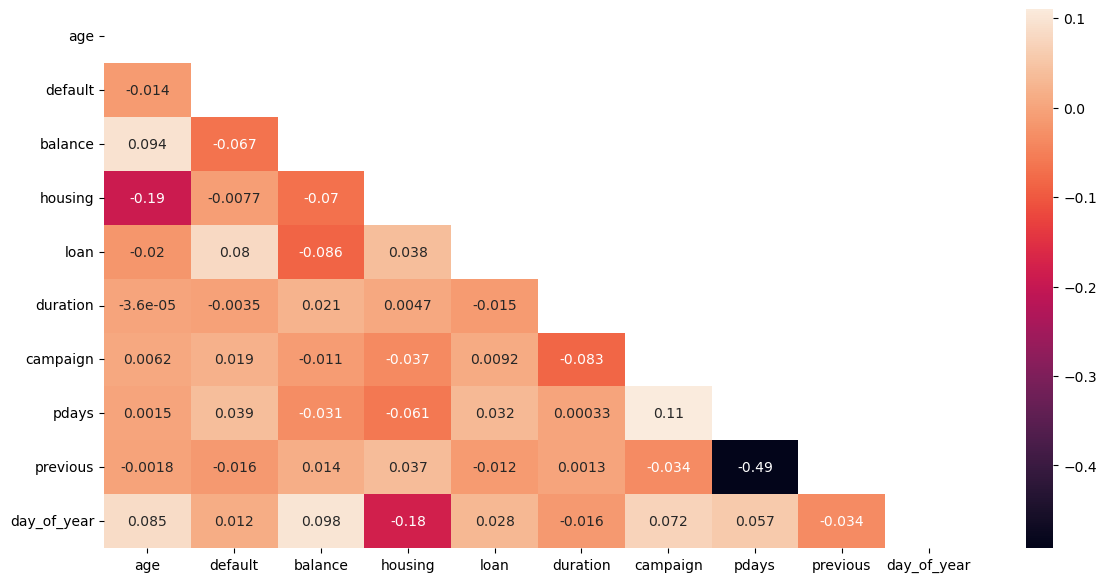

In [70]:
plt.figure(figsize=(14,7))
mask = np.zeros_like(corrM, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrM[mask] = np.nan
sns.heatmap(corrM, annot=True)
plt.show()

**Observations:**

- `previous` and `pdays` has the strongest correlation of `-0.49`. <br>

- `housing` and `age` has `-0.19` <br>

- `housing` and `day_of_year` has correlation coefficient of `-0.18`
- `pdays` and `campaign` has `0.11`

## 7. Training

We have prepared our dataset, done EDA on it to understand it. Now we can train our data.

### 7.1 One hot encoding

Before we train our data, we still have one more step to do. We have categorical varibales. We have to convert these variables into numerical ones. Here we use the method of One Hot Encoding for this.

In [71]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [72]:
train_dicts = df_train.to_dict(orient = 'records') #let's turn it into a dict
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts) #Onehot encoding done here

In [73]:
X_train.shape

(27126, 36)

In [74]:
df_train.shape

(27126, 15)

In [75]:
type(X_train)

numpy.ndarray

In [76]:
type(y_train)

numpy.ndarray

### 7.2 training first model: Logistic Regression

### Base model

Here we'll first train using a base logistic regression model. We'll evaluate it with ROC AUC, since we have class imbalance. Then we'll tune parameters.

In [77]:
#model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [78]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [79]:
y_predict_prob = model.predict_proba(X_val)[:,1]
y_predict_prob

array([0.09209812, 0.09209812, 0.09209812, ..., 0.09209812, 0.09209812,
       0.09209812])

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
fpr, tpr, thresholds  = roc_curve(y_val, y_predict_prob)

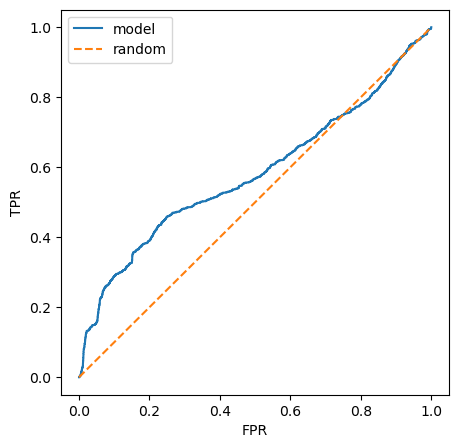

In [82]:
plt.figure(figsize = (5,5))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')


plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [83]:
roc_auc_score(y_val,y_predict_prob)

0.5815144608198863

## parameter tuning for logistic regression 

- `C`

- solvers

- max_iters

In [84]:
C_values = list(np.linspace(0.1, 100, 101))
list_auc = []
for C in C_values:   
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)    
    y_predict_prob = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_predict_prob) 
    list_auc.append(auc)

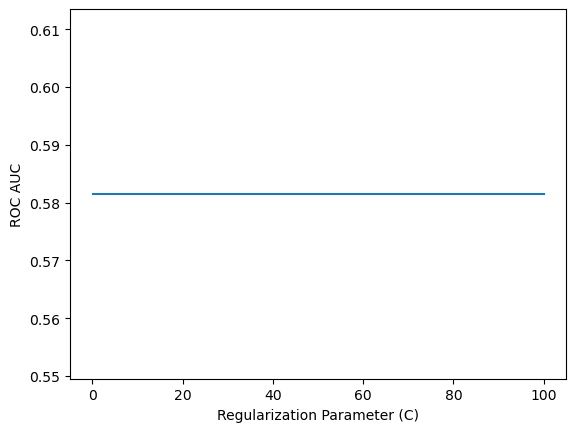

In [85]:
plt.plot(C_values, list_auc)
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("ROC AUC")
plt.show()

We see that ROC AUC is not influences by Regularization parameter C. From now on we will fix C=1.0

In [86]:
C = 1.0

In [87]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
list_auc = []
for solver in solvers:   
    model = LogisticRegression(solver = solver, C=C, random_state=42)
    model.fit(X_train, y_train)
    y_predict_prob = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_predict_prob) 
    print (solver+"-->", auc)
    list_auc.append(auc)

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


newton-cg--> 0.7977222842139192
lbfgs--> 0.5815144608198863
liblinear--> 0.5632101295479863


/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


sag--> 0.5906680401178428
saga--> 0.5922824421293897


/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


We see that for newton-cg solver we get significant improvement in auc values (0.798) in comparison to other solvers (~ 0.5x). Thus we'll fix our solver to `newton-cg`. Next we'll see if numer of iterations affect our auc score. 

In [88]:
solver = 'newton-cg'

In [89]:
max_iters = [100, 200, 400, 600, 800, 1000, 1500, 2000, 3000]
list_auc = []
for max_iter in max_iters:   
    model = LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)    
    y_predict_prob = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_predict_prob) 
    list_auc.append(auc)

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did 

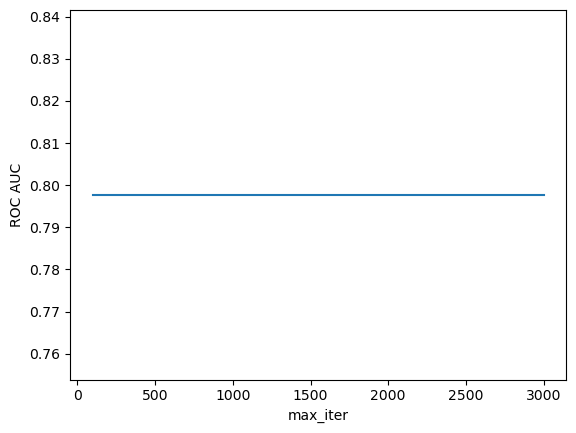

In [90]:
plt.plot(max_iters, list_auc)
plt.xlabel("max_iter")
plt.ylabel("ROC AUC")
plt.show()

With number of maximum iterations, auc values remain the same. So we'll fix this value at 1000. 

In [91]:
max_iter = 1000

## Final model : Logistic Regression

In [92]:
model = LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=42)
model.fit(X_train, y_train)
y_predict_prob = model.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_predict_prob) 

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [93]:
auc.round(3)

0.798

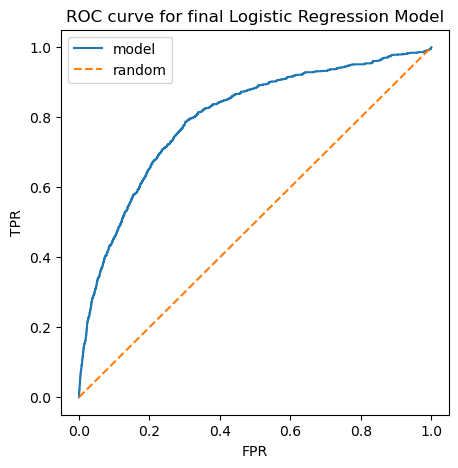

In [94]:
fpr, tpr, thresholds  = roc_curve(y_val, y_predict_prob)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for final Logistic Regression Model")
plt.show()

## 8. Decision Tree

### 8.1 Base Model

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred = dt.predict_proba(X_val)[:,1]

In [98]:
roc_auc_score(y_val, y_pred)

0.7144023414012596

In [99]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

We have surely here an **overfitting** problem.

In [100]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8211391736950061
val: 0.8295316231478672


In [102]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7502567687885748
val: 0.7470061583829214


In [103]:
from sklearn.tree import export_text

In [104]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- duration <= 518.50
|   |--- poutcome=success <= 0.50
|   |   |--- class: 0
|   |--- poutcome=success >  0.50
|   |   |--- class: 1
|--- duration >  518.50
|   |--- duration <= 827.50
|   |   |--- class: 0
|   |--- duration >  827.50
|   |   |--- class: 1



/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 8.2 Decision tree parameter tuning 

- `max_depth`<br>

- `min_samples_leaf`

In [105]:
depths = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.662
   2 -> 0.747
   3 -> 0.830
   4 -> 0.845
   5 -> 0.864
   6 -> 0.886
   8 -> 0.884
  10 -> 0.856
  12 -> 0.810
  14 -> 0.764
  16 -> 0.743
  18 -> 0.732
  20 -> 0.730
None -> 0.714


- **obersvation:** `max_depth= 6` gives us the best auc of 0.886

In [106]:
scores = []

for depth in [5, 6, 8]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200,  500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [107]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,5,1,0.864120
1,5,2,0.864120
2,5,5,0.864114
3,5,10,0.864486
4,5,15,0.864499
5,5,20,0.864474
6,5,100,0.864393
7,5,200,0.866266
8,5,500,0.881127
9,6,1,0.885760


In [108]:
df_scores.sort_values(by = 'auc', ascending = False).head()

,max_depth,min_samples_leaf,auc
24,8,100,0.904826
25,8,200,0.904181
26,8,500,0.896918
22,8,15,0.896781
23,8,20,0.894731


In [109]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             5      6      8
min_samples_leaf                     
1                 0.864  0.886  0.883
2                 0.864  0.885  0.878
5                 0.864  0.887  0.891
10                0.864  0.886  0.891
15                0.864  0.886  0.897
20                0.864  0.886  0.895
100               0.864  0.887  0.905
200               0.866  0.888  0.904
500               0.881  0.893  0.897

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

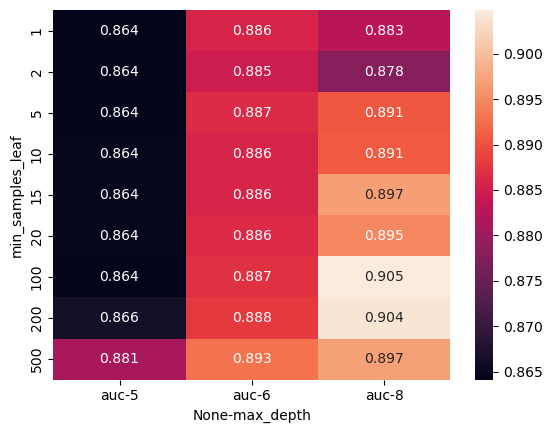

In [110]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

- **Observation:** `max_depth = 8`, `min_samples_leaf = 100` with `auc = 0.905`

### 8.3 Final Decision Tree Model

In [111]:
max_depth=8
min_samples_leaf=100
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)

In [112]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- duration <= 518.50
|   |--- poutcome=success <= 0.50
|   |   |--- duration <= 206.50
|   |   |   |--- day_of_year <= 118.50
|   |   |   |   |--- day_of_year <= 40.50
|   |   |   |   |   |--- duration <= 117.50
|   |   |   |   |   |   |--- balance <= 989.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- balance >  989.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  117.50
|   |   |   |   |   |   |--- balance <= 890.00
|   |   |   |   |   |   |   |--- age <= 35.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  35.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- balance >  890.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- day_of_year >  40.50
|   |   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |   |--- duration <= 103.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- duration >  103.50
|   |   |   |   |   | 

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
y_predict_prob = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val,y_predict_prob) 

0.9048264423593453

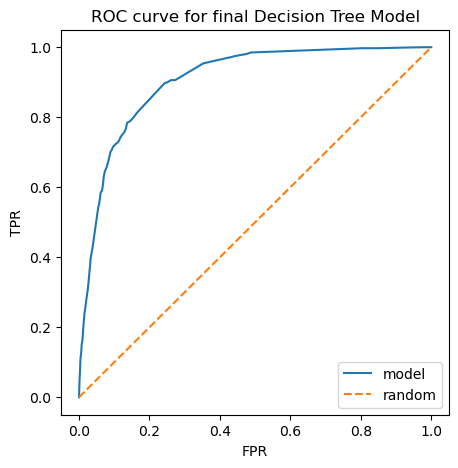

In [114]:
fpr, tpr, thresholds  = roc_curve(y_val, y_predict_prob)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for final Decision Tree Model")
plt.show()

## 9. Random Forest Model

### 9.1 Base Model

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [117]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8838327369250402

### 9.2 Random Forest  Parameter Tuning

- `n_estimator`

- `max_depth`

- `min_samples_leaf`

In [118]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [119]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.883833
1,20,0.909055
2,30,0.916698
3,40,0.920154
4,50,0.921034
5,60,0.922350
6,70,0.923387
7,80,0.923621
8,90,0.924725
9,100,0.924683


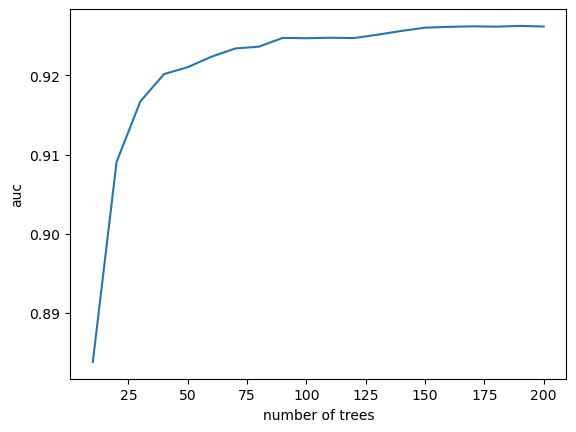

In [120]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

After 75 or 100 trees, we are not gainiing auc very slowly.

In [121]:
scores = []

for d in [5, 8, 10, 12, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =d, 
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [122]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.889611
1,5,20,0.895019
2,5,30,0.894556
3,5,40,0.898659
4,5,50,0.899935


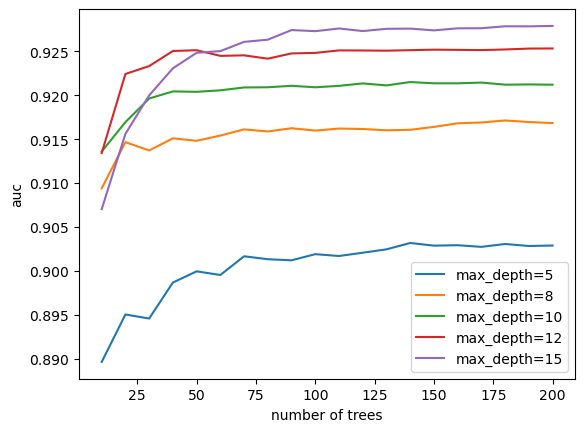

In [123]:
for d in [5, 8, 10, 12, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

max_depth = 15 is the best depth.

**tuning `min_samples_leaf` parameter**

In [124]:
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =max_depth, 
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [125]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.907025
1,1,20,0.915606
2,1,30,0.919985
3,1,40,0.923079
4,1,50,0.924845


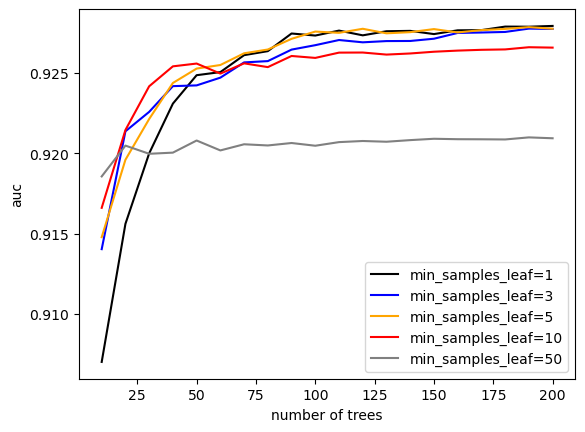

In [126]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col, 
             label='min_samples_leaf=%d' % s)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

In [127]:
min_samples_leaf = 5
max_depth = 15
n_estimator=150

### 9.3 Final Random Forest Model

In [128]:
rf = RandomForestClassifier(n_estimators=n_estimator, 
                            max_depth = max_depth,
                            min_samples_leaf = min_samples_leaf,
                            random_state=1,
                            n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=150,
                       n_jobs=-1, random_state=1)

This is our final random forest model. If I have time: I should try with:

- `max_features`
- `bootstrap`

## 10. Gradient boosting with XGBoost 

## Basic XGBoost model

In [129]:
# install xgboost, if not done yet
!pip install xgboost

In [130]:
import xgboost as xgb

In [131]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [132]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [133]:
y_pred = model.predict(dval)

In [134]:
roc_auc_score(y_val, y_pred)

0.9232279628941995

> Since, XGBoost is also prone to overfitting like DecisionTree, we have to be careful.

In [135]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [136]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [137]:
print(output.stdout)

[0]	train-auc:0.88779	val-auc:0.88022
[5]	train-auc:0.93026	val-auc:0.91659
[10]	train-auc:0.94329	val-auc:0.92401
[15]	train-auc:0.94967	val-auc:0.92766
[20]	train-auc:0.95641	val-auc:0.93262
[25]	train-auc:0.96024	val-auc:0.93388
[30]	train-auc:0.96328	val-auc:0.93451
[35]	train-auc:0.96602	val-auc:0.93571
[40]	train-auc:0.96750	val-auc:0.93573
[45]	train-auc:0.97028	val-auc:0.93542
[50]	train-auc:0.97151	val-auc:0.93514
[55]	train-auc:0.97322	val-auc:0.93550
[60]	train-auc:0.97454	val-auc:0.93522
[65]	train-auc:0.97683	val-auc:0.93522
[70]	train-auc:0.97782	val-auc:0.93558
[75]	train-auc:0.97963	val-auc:0.93496
[80]	train-auc:0.98084	val-auc:0.93438
[85]	train-auc:0.98209	val-auc:0.93397
[90]	train-auc:0.98325	val-auc:0.93344
[95]	train-auc:0.98414	val-auc:0.93331
[100]	train-auc:0.98462	val-auc:0.93299
[105]	train-auc:0.98481	val-auc:0.93284
[110]	train-auc:0.98544	val-auc:0.93259
[115]	train-auc:0.98625	val-auc:0.93245
[120]	train-auc:0.98749	val-auc:0.93267
[125]	train-auc:0.9885

In [138]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [139]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.88779,0.88022
1,5,0.93026,0.91659
2,10,0.94329,0.92401
3,15,0.94967,0.92766
4,20,0.95641,0.93262
5,25,0.96024,0.93388
6,30,0.96328,0.93451
7,35,0.96602,0.93571
8,40,0.96750,0.93573
9,45,0.97028,0.93542


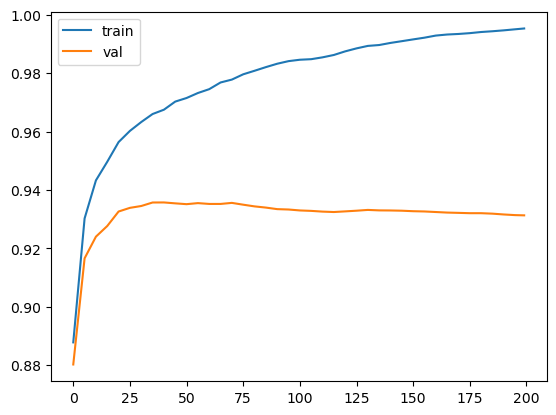

In [140]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

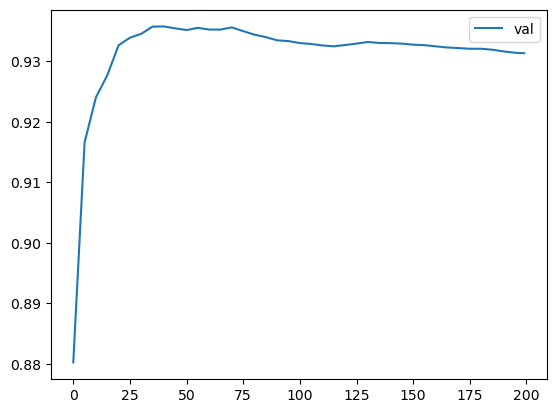

In [141]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [142]:
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
8,40,0.9675,0.93573


Thus, maximum auc of 0.93573 is achieved for 40 iterations.

### 10.1 parameter tuning for XGboost

- `eta` (also called learning rate)

- `max_depth`

- `min_child_weight`

> **Caution:** Run the following codes one row after another row serially

In [143]:
scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.5, 1]

In [144]:
%%capture output

xgb_params = {
    'eta': 0.01,    
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [145]:
key = f'eta={etas[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = eta=0.01


In [146]:
scores[key]

,num_iter,train_auc,val_auc
0,0,0.88779,0.88022
1,5,0.89559,0.89145
2,10,0.89968,0.89547
3,15,0.90102,0.89626
4,20,0.90232,0.89716
5,25,0.90327,0.89799
6,30,0.90339,0.89789
7,35,0.90364,0.89809
8,40,0.90696,0.90027
9,45,0.90844,0.90139


In [147]:
%%capture output

xgb_params['eta'] = etas[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [148]:
key = f'eta={etas[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.05


In [149]:
%%capture output

xgb_params['eta'] = etas[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [150]:
key = f'eta={etas[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.1


In [151]:
%%capture output

xgb_params['eta'] = etas[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [152]:
key = f'eta={etas[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.3


In [153]:
%%capture output

xgb_params['eta'] = etas[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [154]:
key = f'eta={etas[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.5


In [155]:
%%capture output

xgb_params['eta'] = etas[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [156]:
key = f'eta={etas[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=1


In [157]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

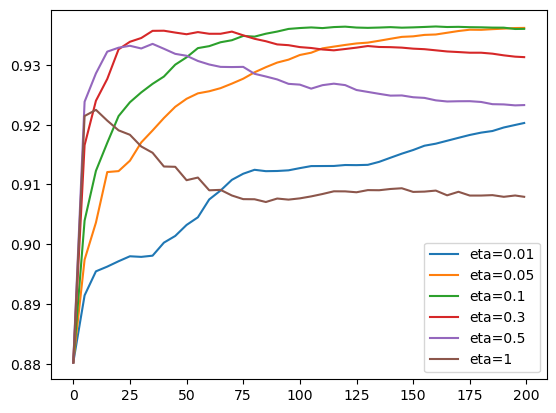

In [158]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Thus we see above that 0.01 and 1 are the worst. eta=1 learns very best, but degrade also fast indicating overfitting. eta = 0.01 keeps learning very slow until 200 and still increasing. eta=0.3 (red one) acheives high auc but start to overfit, although not as strong as 1. eta=0.1 learns slowly, not the slowest, reaches almost a plateau, bit doesn't overfit. eta=0.05 leanrs the slowest and doesn't overfit until 200 iterations. I seems to cross green (0.1). <br>
**Conslusion**: 
- Our choice can be green (0.1), orange (0.05) or red(0.3 only, if we iterate for 40) 
- eta = 0.1 seems to be best one.

**tuning the parameter `max_depth`**

In [159]:
scores = {}
max_depths = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [160]:
%%capture output

xgb_params = {
    'eta': 0.1,    
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5,evals=watchlist)

In [161]:
key = f'max_depth={max_depths[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=1


In [162]:
%%capture output

xgb_params['max_depth'] = max_depths[1]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [163]:
key = f'max_depth={max_depths[1]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=2


In [164]:
%%capture output

xgb_params['max_depth'] = max_depths[2]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [165]:
key = f'max_depth={max_depths[2]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=4


In [166]:
%%capture output

xgb_params['max_depth'] = max_depths[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [167]:
key = f'max_depth={max_depths[3]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=6


In [168]:
%%capture output

xgb_params['max_depth'] = max_depths[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [169]:
key = f'max_depth={max_depths[4]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=8


In [170]:
%%capture output

xgb_params['max_depth'] = max_depths[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [171]:
key = f'max_depth={max_depths[5]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=10


In [172]:
%%capture output

xgb_params['max_depth'] = max_depths[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [173]:
key = f'max_depth={max_depths[6]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=12


In [174]:
%%capture output

xgb_params['max_depth'] = max_depths[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [175]:
key = f'max_depth={max_depths[7]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=14


In [176]:
%%capture output

xgb_params['max_depth'] = max_depths[8]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [177]:
key = f'max_depth={max_depths[8]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=16


In [178]:
%%capture output

xgb_params['max_depth'] = max_depths[9]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [179]:
key = f'max_depth={max_depths[9]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=18


In [180]:
%%capture output

xgb_params['max_depth'] = max_depths[10]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [181]:
key = f'max_depth={max_depths[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=20


In [182]:
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=4', 'max_depth=6', 'max_depth=8', 'max_depth=10', 'max_depth=12', 'max_depth=14', 'max_depth=16', 'max_depth=18', 'max_depth=20'])

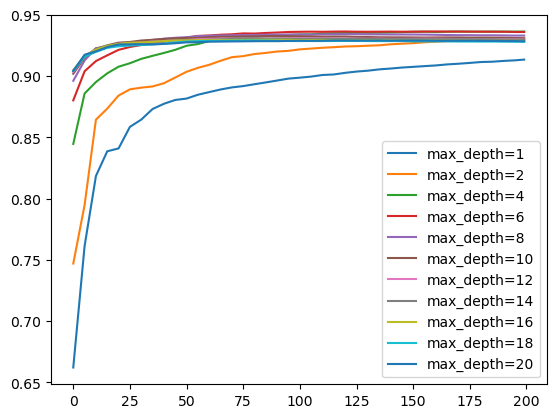

In [183]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.9, 0.95)

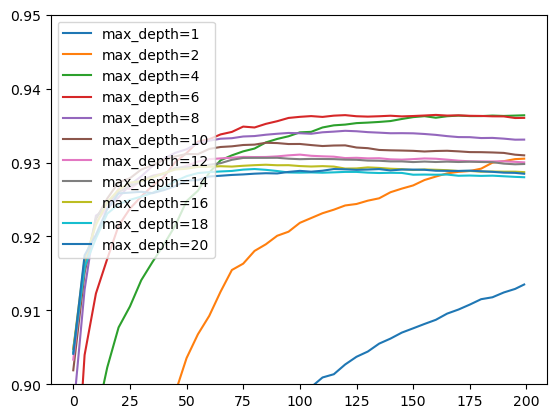

In [184]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.90,0.95)

- 4 (green) or 6 (red) seems to be the best values of max_depth parameter. I go with `max_depth = 6`

**tuning the parameter `min_child_weight`**

In [185]:
scores = {}
child_weights = [1, 2, 4, 5, 10, 15, 20, 25, 30, 35, 40]

In [186]:
%%capture output

xgb_params = {
    'eta': 0.1,    
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5,evals=watchlist)

In [187]:
key = f'min_child_weight={child_weights[0]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=1


In [188]:
%%capture output
xgb_params['min_child_weight'] = child_weights[1]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [189]:
key = f'min_child_weight={child_weights[1]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=2


In [190]:
%%capture output
xgb_params['min_child_weight'] = child_weights[2]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [191]:
key = f'min_child_weight={child_weights[2]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=4


In [192]:
%%capture output
xgb_params['min_child_weight'] = child_weights[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [193]:
key = f'min_child_weight={child_weights[3]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=5


In [194]:
%%capture output
xgb_params['min_child_weight'] = child_weights[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [195]:
key = f'min_child_weight={child_weights[4]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=10


In [196]:
%%capture output
xgb_params['min_child_weight'] = child_weights[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [197]:
key = f'min_child_weight={child_weights[5]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=15


In [198]:
%%capture output
xgb_params['min_child_weight'] = child_weights[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [199]:
key = f'min_child_weight={child_weights[6]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=20


In [200]:
%%capture output
xgb_params['min_child_weight'] = child_weights[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [201]:
key = f'min_child_weight={child_weights[7]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=25


In [202]:
%%capture output
xgb_params['min_child_weight'] = child_weights[8]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [203]:
key = f'min_child_weight={child_weights[8]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=30


In [204]:
%%capture output
xgb_params['min_child_weight'] = child_weights[9]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [205]:
key = f'min_child_weight={child_weights[9]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=35


In [206]:
%%capture output
xgb_params['min_child_weight'] = child_weights[10]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [207]:
key = f'min_child_weight={child_weights[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=40


In [208]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=4', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=25', 'min_child_weight=30', 'min_child_weight=35', 'min_child_weight=40'])

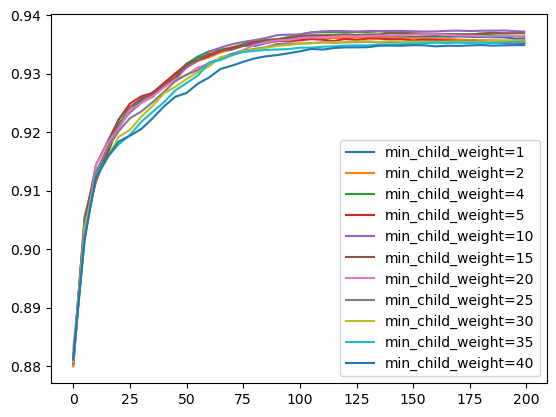

In [209]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.93, 0.94)

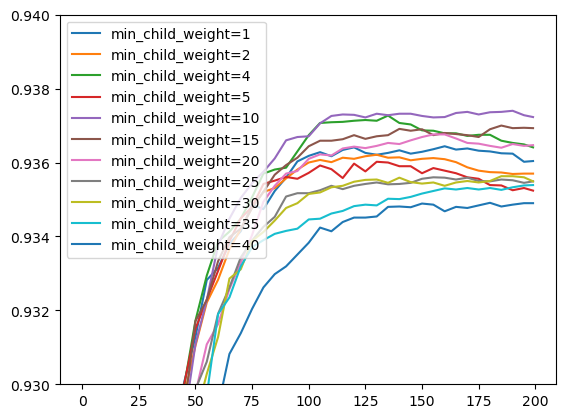

In [210]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.93,0.94)

Thus, `min_child_weight = 10` gives us the best result.

In [211]:
df_score = scores['min_child_weight=10']
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
38,190,0.96482,0.9374


**Let's train model with best values of the tuned parameters**

In [213]:
xgb_params = {
    'eta': 0.1,    
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=190)
y_pred = model.predict(dval)
print('Result of Final Gradient Boosting Model:')
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred).round(3)}')

Result of Final Gradient Boosting Model:
ROC AUC score: 0.937


## 11. Deciding the best model


- train final models on full_train dataset
- test it on test dataset and claculate ROC AUC score
- decide the best model from auc score

### 11.1 logistic regression

### 11.2 Decision Tree

### 11.3 Random Forest

### 11.4 XGBoost

In [ ]:
xgb_params = {
    'eta': 0.1,    
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=190)
y_pred = model.predict(dtest)
print('Result of Final Gradient Boosting Model:')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred).round(3)}')

## 12. save the final XGBoost model

In [1]:
import pickle

In [2]:
output_file = 'model.bin' #a nicer way of writing the previous line using f-strings
output_file

'model.bin'

In [3]:
with open(output_file,'wb') as f_out: 
    pickle.dump((dv, model), f_out)

NameError: name 'dv' is not defined

**to do:**
- [ ] Select the best model
- [ ] save the best model
- [ ] load the best model